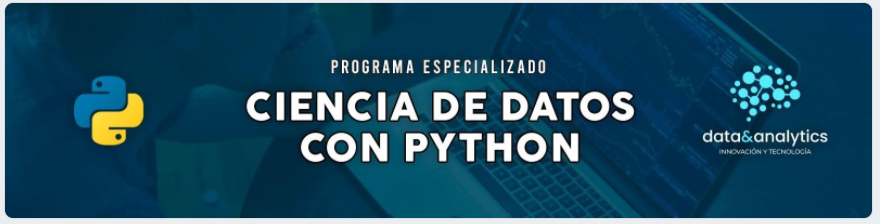

#DATA & ANALYTICS

----------------------------
SESIÓN 04. MÉTODOS DE DEPENDENCIA - MULTIVARIABLE (SUPERVISADOS)

Instructor: Ing. Yaneth Ccahuantico

E-mail: yane.data@gmail.com

Web: www.datayanalytics.com

# Data

In [ ]:
#cargamos las librerias
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as stats # estadística
import random
import matplotlib.pyplot as plt

random.seed(123)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_riesgos = pd.read_csv('/content/drive/MyDrive/PROGRAMA DS PYTHON - INSTR/Sesion Nº 14/Data/Data - Riesgos.csv')
data_riesgos.head(10)

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.0,6.0,3230.0,192.0,2,3.0,2,1
1,2211,32.0,185.0,7.0,2930.0,217.0,2,1.0,5,1
2,2212,28.0,NaN,7.0,1883.7,202.0,2,1.0,2,1
3,2216,56.0,200.0,0.0,850.0,194.0,2,1.0,5,1
4,2218,32.0,131.0,65.0,3200.0,200.0,2,1.0,2,1
5,2219,34.0,145.0,6.0,7000.0,196.0,2,5.0,2,1
6,2226,NaN,114.0,0.0,2171.5,178.0,2,2.0,1,1
7,2227,27.0,116.0,0.0,800.0,169.0,2,1.0,5,1
8,2228,26.0,182.0,6.0,3150.0,190.0,4,3.0,5,1
9,2230,25.0,154.0,1.0,2600.0,189.0,2,1.0,2,1


### TRATAMIENTO GENERAL DE DATOS

In [ ]:
data_riesgos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             4500 non-null   int64  
 1   edad           4487 non-null   float64
 2   meses          4494 non-null   float64
 3   max_ant        4496 non-null   float64
 4   ingreso        4495 non-null   float64
 5   score          4495 non-null   float64
 6   tipo_vivienda  4500 non-null   int64  
 7   zona           4494 non-null   float64
 8   nivel          4500 non-null   int64  
 9   riesgo         4500 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 351.7 KB


In [ ]:
# Data numérica
# 'edad', 'meses', 'max_ant', 'ingreso', 'score'
data_riesgos_num = data_riesgos.loc[:, ['edad', 'meses', 'max_ant', 'ingreso', 'score']] 
data_riesgos_num.head(6)

,edad,meses,max_ant,ingreso,score
0,33.0,128.0,6.0,3230.0,192.0
1,32.0,185.0,7.0,2930.0,217.0
2,28.0,NaN,7.0,1883.7,202.0
3,56.0,200.0,0.0,850.0,194.0
4,32.0,131.0,65.0,3200.0,200.0
5,34.0,145.0,6.0,7000.0,196.0


In [ ]:
data_riesgos_num.isnull().sum() 

edad       13
meses       6
max_ant     4
ingreso     5
score       5
dtype: int64

In [ ]:
# Data categórica 
#'tipo_vivienda', 'zona', 'nivel', 'riesgo'
data_riesgo_cat = data_riesgos[['tipo_vivienda', 'zona', 'nivel', 'riesgo']] 
data_riesgo_cat.head(6)

,tipo_vivienda,zona,nivel,riesgo
0,2,3.0,2,1
1,2,1.0,5,1
2,2,1.0,2,1
3,2,1.0,5,1
4,2,1.0,2,1
5,2,5.0,2,1


In [ ]:
data_riesgo_cat.isnull().sum()

tipo_vivienda    0
zona             6
nivel            0
riesgo           0
dtype: int64

In [ ]:
# 1ra forma imputación variables cuantitativas
# Imputación paramétrica. Variables numéricas
# ---------------------------------------------

from sklearn.impute import SimpleImputer

simple = SimpleImputer(strategy='median')
data_riesgos_numf = simple.fit_transform(data_riesgos_num)

data_riesgos_numf



array([[3.3000e+01, 1.2800e+02, 6.0000e+00, 3.2300e+03, 1.9200e+02],
       [3.2000e+01, 1.8500e+02, 7.0000e+00, 2.9300e+03, 2.1700e+02],
       [2.8000e+01, 1.6100e+02, 7.0000e+00, 1.8837e+03, 2.0200e+02],
       ...,
       [4.8000e+01, 1.9400e+02, 1.2400e+02, 2.3000e+04, 2.2400e+02],
       [3.9000e+01, 2.4500e+02, 1.2100e+02, 1.2450e+04, 2.4000e+02],
       [6.5000e+01, 6.7400e+02, 3.8000e+01, 2.0000e+04, 2.3800e+02]])

In [ ]:
# 2da Imputación no paramétrica. A partir de otras variables. Variables numéricas
#------------------------------
from sklearn.impute import KNNImputer

imputacion_NP = KNNImputer(n_neighbors=2)
data_riesgos_numf =imputacion_NP.fit_transform(data_riesgos_num)

data_riesgos_numf

#data_riesgos_numf =  [np.around(x) for x in data_riesgos_numf]
#data_riesgos_numf

array([[3.3000e+01, 1.2800e+02, 6.0000e+00, 3.2300e+03, 1.9200e+02],
       [3.2000e+01, 1.8500e+02, 7.0000e+00, 2.9300e+03, 2.1700e+02],
       [2.8000e+01, 1.3700e+02, 7.0000e+00, 1.8837e+03, 2.0200e+02],
       ...,
       [4.8000e+01, 1.9400e+02, 1.2400e+02, 2.3000e+04, 2.2400e+02],
       [3.9000e+01, 2.4500e+02, 1.2100e+02, 1.2450e+04, 2.4000e+02],
       [6.5000e+01, 6.7400e+02, 3.8000e+01, 2.0000e+04, 2.3800e+02]])

In [ ]:
# Imputando variables cualitativas
# Imputación paramétrica: Moda

simple = SimpleImputer(strategy='most_frequent')  # Moda
data_riesgo_catf = simple.fit_transform(data_riesgo_cat)

data_riesgo_catf

array([[2., 3., 2., 1.],
       [2., 1., 5., 1.],
       [2., 1., 2., 1.],
       ...,
       [4., 1., 2., 0.],
       [4., 5., 2., 0.],
       [4., 5., 2., 0.]])

In [ ]:
# Convertimos en DataFrame la matriz _ numéricas

df1 = pd.DataFrame(
    data=data_riesgos_numf,
    columns=['edad', 'meses', 'max_ant', 'ingreso', 'score'])

df1.isnull().sum()

edad       0
meses      0
max_ant    0
ingreso    0
score      0
dtype: int64

In [ ]:
# Convertimos en DataFrame la matriz _ cualitativas

df2 = pd.DataFrame(
    data=data_riesgo_catf,
    columns=['tipo_vivienda', 'zona', 'nivel', 'riesgo'])

#df2.isnull().sum()


df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tipo_vivienda  4500 non-null   float64
 1   zona           4500 non-null   float64
 2   nivel          4500 non-null   float64
 3   riesgo         4500 non-null   float64
dtypes: float64(4)
memory usage: 140.8 KB


In [ ]:
cols_cual  = df2.columns

In [ ]:
# convertimos las columnas a tipo cualitativo
df2 = df2.astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tipo_vivienda  4500 non-null   object
 1   zona           4500 non-null   object
 2   nivel          4500 non-null   object
 3   riesgo         4500 non-null   object
dtypes: object(4)
memory usage: 140.8+ KB


In [ ]:
data_riesgo_final = pd.DataFrame([np.round(val, decimals=0) for val in data_riesgos_numf],          
                    columns=['edad', 'meses', 'max_ant', 'ingreso', 'score']  
                    )
data_riesgo_final.head()

,edad,meses,max_ant,ingreso,score
0,33.0,128.0,6.0,3230.0,192.0
1,32.0,185.0,7.0,2930.0,217.0
2,28.0,137.0,7.0,1884.0,202.0
3,56.0,200.0,0.0,850.0,194.0
4,32.0,131.0,65.0,3200.0,200.0


### Data final

In [ ]:
# Unimos los 02 DataFrame 

data_riesgo_final = pd.merge(df1, df2, left_index=True, right_index=True)
data_riesgo_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edad           4500 non-null   float64
 1   meses          4500 non-null   float64
 2   max_ant        4500 non-null   float64
 3   ingreso        4500 non-null   float64
 4   score          4500 non-null   float64
 5   tipo_vivienda  4500 non-null   object 
 6   zona           4500 non-null   object 
 7   nivel          4500 non-null   object 
 8   riesgo         4500 non-null   object 
dtypes: float64(5), object(4)
memory usage: 316.5+ KB


In [ ]:
data_riesgo_final.head()

,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,33.0,128.0,6.0,3230.0,192.0,2.0,3.0,2.0,1.0
1,32.0,185.0,7.0,2930.0,217.0,2.0,1.0,5.0,1.0
2,28.0,137.0,7.0,1883.7,202.0,2.0,1.0,2.0,1.0
3,56.0,200.0,0.0,850.0,194.0,2.0,1.0,5.0,1.0
4,32.0,131.0,65.0,3200.0,200.0,2.0,1.0,2.0,1.0


## A) REGRESION LINEAL MULTIPLE


Variable dependiente: Ingresos

Variable independiente: x - variables

In [ ]:
# Correlación r de pearson
from scipy.stats import pearsonr

r, p = pearsonr(data_riesgo_final['ingreso'], data_riesgo_final['score'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))

Correlación Pearson=0.364, p-value=0.000


In [ ]:
# Convertimos a las variables cualitativas en variables DUMMY

t_vivienda = pd.get_dummies(data_riesgo_final.tipo_vivienda, prefix='tipo_vivienda')
t_vivienda = t_vivienda.astype(int)

print(t_vivienda.head())

   tipo_vivienda_1.0  tipo_vivienda_2.0  tipo_vivienda_3.0  tipo_vivienda_4.0
0                  0                  1                  0                  0
1                  0                  1                  0                  0
2                  0                  1                  0                  0
3                  0                  1                  0                  0
4                  0                  1                  0                  0


In [ ]:
zona = pd.get_dummies(data_riesgo_final.zona, prefix='zona')
zona = zona.astype(int)

print(zona.head())

   zona_1.0  zona_2.0  zona_3.0  zona_4.0  zona_5.0
0         0         0         1         0         0
1         1         0         0         0         0
2         1         0         0         0         0
3         1         0         0         0         0
4         1         0         0         0         0


In [ ]:
nivel = pd.get_dummies(data_riesgo_final.nivel, prefix='nivel')
nivel = nivel.astype(int)

print(nivel.head())

   nivel_1.0  nivel_2.0  nivel_3.0  nivel_4.0  nivel_5.0
0          0          1          0          0          0
1          0          0          0          0          1
2          0          1          0          0          0
3          0          0          0          0          1
4          0          1          0          0          0


### Data Final LM

In [ ]:
# Unimos todos los 02 DataFrame, incluyendo los dummy 

data_riesgo_finalD = pd.merge(df1, t_vivienda, left_index=True, right_index=True)
data_riesgo_finalD = pd.merge(data_riesgo_finalD, zona,  left_index=True, right_index=True)
data_riesgo_finalD = pd.merge(data_riesgo_finalD, nivel, left_index=True, right_index=True)

data_riesgo_finalD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               4500 non-null   float64
 1   meses              4500 non-null   float64
 2   max_ant            4500 non-null   float64
 3   ingreso            4500 non-null   float64
 4   score              4500 non-null   float64
 5   tipo_vivienda_1.0  4500 non-null   int64  
 6   tipo_vivienda_2.0  4500 non-null   int64  
 7   tipo_vivienda_3.0  4500 non-null   int64  
 8   tipo_vivienda_4.0  4500 non-null   int64  
 9   zona_1.0           4500 non-null   int64  
 10  zona_2.0           4500 non-null   int64  
 11  zona_3.0           4500 non-null   int64  
 12  zona_4.0           4500 non-null   int64  
 13  zona_5.0           4500 non-null   int64  
 14  nivel_1.0          4500 non-null   int64  
 15  nivel_2.0          4500 non-null   int64  
 16  nivel_3.0          4500 

In [ ]:
data_riesgo_finalD.head()

,edad,meses,max_ant,ingreso,score,tipo_vivienda_1.0,tipo_vivienda_2.0,tipo_vivienda_3.0,tipo_vivienda_4.0,zona_1.0,zona_2.0,zona_3.0,zona_4.0,zona_5.0,nivel_1.0,nivel_2.0,nivel_3.0,nivel_4.0,nivel_5.0
0,33.0,128.0,6.0,3230.0,192.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,32.0,185.0,7.0,2930.0,217.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,28.0,137.0,7.0,1883.7,202.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,56.0,200.0,0.0,850.0,194.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,32.0,131.0,65.0,3200.0,200.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


### Multicolinealidad

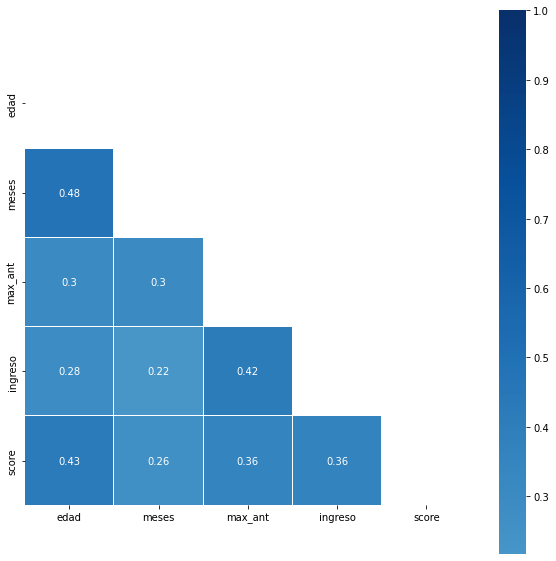

In [ ]:

# Graficamos correlación de las variables independientes
correlacion = df1.corr()

mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0, 
            square = True, linewidths=.1, annot=True)

# no se tienen variables con correlaciones >= 0.400; por tanto, se mantienen todos.

### Gráficos

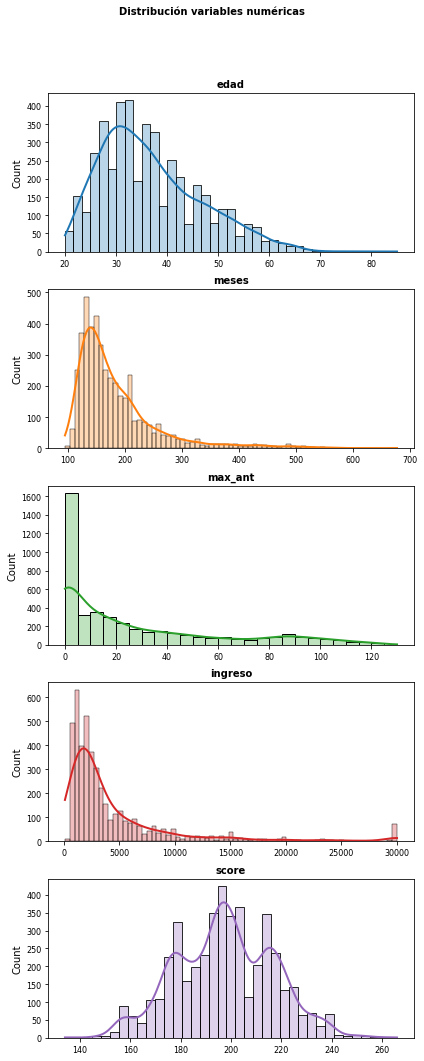

In [ ]:
# Gráfico de distribución para las  variable numérica

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 15))
axes = axes.flat
columnas_numeric = data_riesgo_finalD.select_dtypes(include=['float64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data_riesgo_finalD,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

   
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

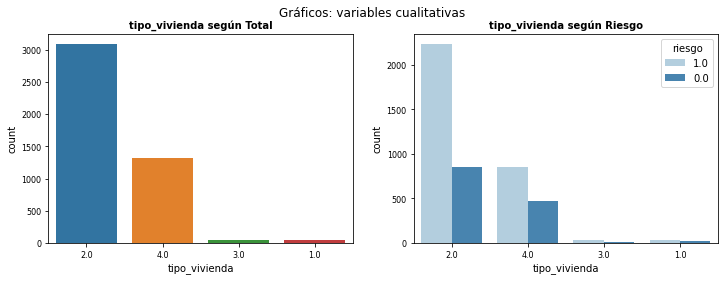

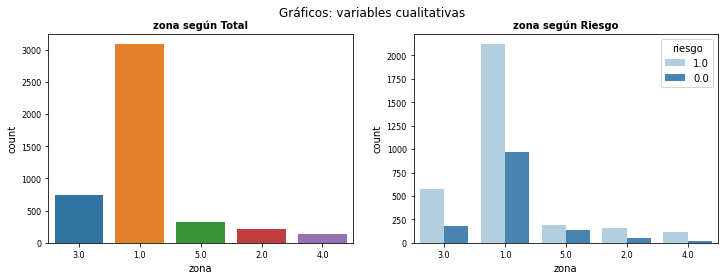

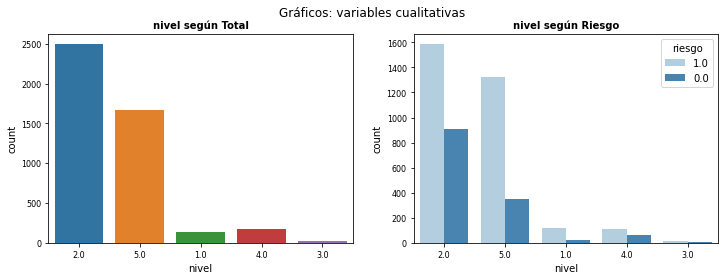

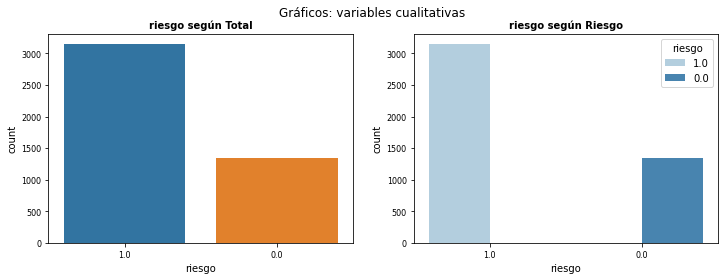

In [ ]:
# Graficando las variables cualitativas


for i, colum in enumerate(cols_cual): 
    fig, ax = plt.subplots(1, 2, figsize=(12, 3.84))
    fig.suptitle('Gráficos: variables cualitativas')

    sns.countplot(x=colum, data=data_riesgo_final, ax=ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)

    sns.countplot(x=colum, hue="riesgo", data=data_riesgo_final, palette="Blues", ax=ax[1])
    ax[1].set_title(str(colum) + " según Riesgo", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)

In [ ]:
#import numpy as np: ----- Tratando los datos outliers
# corrigiendo las variables numèricas 
data_riesgo_finalD['edad'] =    np.where(data_riesgo_finalD['edad'] >=70 , 70, data_riesgo_finalD['edad'])
data_riesgo_finalD['meses'] =   np.where(data_riesgo_finalD['meses'] >=400 , 400, data_riesgo_finalD['meses'])
data_riesgo_finalD['ingreso'] = np.where(data_riesgo_finalD['ingreso'] >=10000 , 10000, data_riesgo_finalD['ingreso'])
data_riesgo_finalD['max_ant'] = np.where(data_riesgo_finalD['max_ant'] >=36 , 36, data_riesgo_finalD['max_ant'])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


In [ ]:
# Variables independientes

X_dat = data_riesgo_finalD.loc[:, ['edad', 'meses', 'max_ant', 'score','tipo_vivienda_1.0', 'tipo_vivienda_2.0',
                           'tipo_vivienda_3.0', 'tipo_vivienda_4.0', 'zona_1.0', 'zona_2.0', 'zona_3.0', 'zona_4.0',
                           'zona_5.0', 'nivel_1.0', 'nivel_2.0', 'nivel_3.0', 'nivel_4.0', 'nivel_5.0']] 
X_dat.head(6)

,edad,meses,max_ant,score,tipo_vivienda_1.0,tipo_vivienda_2.0,tipo_vivienda_3.0,tipo_vivienda_4.0,zona_1.0,zona_2.0,zona_3.0,zona_4.0,zona_5.0,nivel_1.0,nivel_2.0,nivel_3.0,nivel_4.0,nivel_5.0
0,33.0,128.0,6.0,192.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,32.0,185.0,7.0,217.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,28.0,137.0,7.0,202.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,56.0,200.0,0.0,194.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,32.0,131.0,36.0,200.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
5,34.0,145.0,6.0,196.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
# variable dependiente
Y_dat = data_riesgo_finalD.loc[:, ['ingreso']] 
Y_dat.head(6)

,ingreso
0,3230.0
1,2930.0
2,1883.7
3,850.0
4,3200.0
5,7000.0


In [ ]:
# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_dat, y = Y_dat)

LinearRegression()

In [ ]:
# Información del modelo

modelo = sm.OLS(endog=Y_dat, exog=X_dat,) # agregamos una constante al modelo
modelo = modelo.fit()     # ajustamos el modelo. Por default seré a través de Mínimos Cuadrados Ordinarios
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:56:04   Log-Likelihood:                -41348.
No. Observations:                4500   AIC:                         8.273e+04
Df Residuals:                    4484   BIC:                         8.283e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
edad                 35.8559      4.45

El modelo es capaz de explicar el 35.5% de la variabilidad observada en los ingresos.

El p-value del modelo es significativo (0.000) por lo que se puede aceptar que el modelo es mejor que lo esperado es por azar, al menos uno de los coeficientes parciales de regresión es distinto de 0.

In [ ]:
# Intervalos de confianza para los coeficientes del modelo

intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
edad,27.125363,44.586431
meses,1.686608,4.160045
max_ant,37.687308,47.792399
score,24.548044,34.779899
tipo_vivienda_1.0,-645.622920,655.174131
tipo_vivienda_2.0,-2696.260325,-1921.097759
tipo_vivienda_3.0,-2929.741173,-1500.060227
tipo_vivienda_4.0,-2420.287485,-1451.883965
zona_1.0,-1336.504046,-683.227096
zona_2.0,-1782.279186,-970.298888


In [ ]:
prediccion = modelo.predict(exog = X_dat)

prediccion = pd.DataFrame(
    data=prediccion,
    columns=['prediccion'])

residuos   = prediccion.prediccion - Y_dat.ingreso #(Y Estimado - Y Real)
residuos

0        104.131928
1       -200.686260
2       1583.829640
3       1802.254847
4       1573.541079
           ...     
4495   -3235.958751
4496   -3412.101988
4497   -3384.066374
4498   -3571.776390
4499   -2245.735401
Length: 4500, dtype: float64

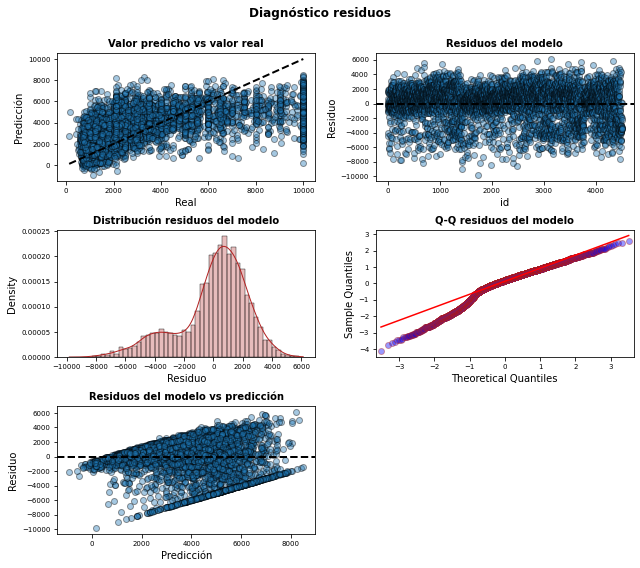

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(Y_dat, prediccion.prediccion, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([Y_dat.min(), Y_dat.max()], [Y_dat.min(), Y_dat.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(Y_dat))), residuos ,
                   edgecolors=(0, 0, 0), 
                   alpha = 0.4
                   )
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion.prediccion, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Error de test del modelo 

X_data = sm.add_constant(X_dat, prepend=True)
predicciones = modelo.predict(exog = X_dat)
rmse = mean_squared_error(
        y_true  = Y_dat,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 2367.1025533514


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


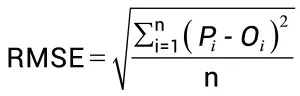

**Error Cuadrático Medio**
Cuanto más pequeño es un valor RMSE, la estimación del modelo es más precisa.

La cantidad de error entre la variable "Ingreso" y el "Ingreso predicho" es de  2300 aprox.


## B) REGRESIÓN LOGÍSTICA

Variable dependiente: riesgo


In [ ]:
data_riesgo_finalD.head()

,edad,meses,max_ant,ingreso,score,tipo_vivienda_1.0,tipo_vivienda_2.0,tipo_vivienda_3.0,tipo_vivienda_4.0,zona_1.0,zona_2.0,zona_3.0,zona_4.0,zona_5.0,nivel_1.0,nivel_2.0,nivel_3.0,nivel_4.0,nivel_5.0
0,33.0,128.0,6.0,3230.0,192.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,32.0,185.0,7.0,2930.0,217.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,28.0,137.0,7.0,1883.7,202.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,56.0,200.0,0.0,850.0,194.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,32.0,131.0,36.0,3200.0,200.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
data_riesgo_finalD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               4500 non-null   float64
 1   meses              4500 non-null   float64
 2   max_ant            4500 non-null   float64
 3   ingreso            4500 non-null   float64
 4   score              4500 non-null   float64
 5   tipo_vivienda_1.0  4500 non-null   int64  
 6   tipo_vivienda_2.0  4500 non-null   int64  
 7   tipo_vivienda_3.0  4500 non-null   int64  
 8   tipo_vivienda_4.0  4500 non-null   int64  
 9   zona_1.0           4500 non-null   int64  
 10  zona_2.0           4500 non-null   int64  
 11  zona_3.0           4500 non-null   int64  
 12  zona_4.0           4500 non-null   int64  
 13  zona_5.0           4500 non-null   int64  
 14  nivel_1.0          4500 non-null   int64  
 15  nivel_2.0          4500 non-null   int64  
 16  nivel_3.0          4500 

In [ ]:
riesgo = pd.get_dummies(data_riesgo_final.riesgo, prefix='riesgo')
riesgo = riesgo.astype(int)

riesgo = riesgo.drop(['riesgo_1.0'], axis=1)
riesgo.columns = ['riesgo']
print(len(riesgo))

4500


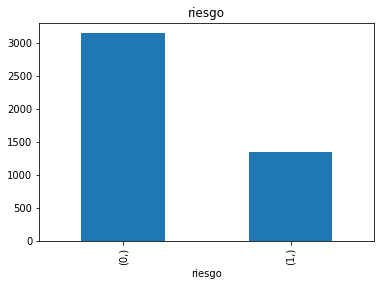

In [ ]:
d1 = riesgo.value_counts()
d1.plot(kind='bar', title='riesgo')

### Data final RL

In [ ]:
data_riesgo_finalRL = pd.merge(data_riesgo_finalD, riesgo, left_index=True, right_index=True)
data_riesgo_finalRL.head()

,edad,meses,max_ant,ingreso,score,tipo_vivienda_1.0,tipo_vivienda_2.0,tipo_vivienda_3.0,tipo_vivienda_4.0,zona_1.0,zona_2.0,zona_3.0,zona_4.0,zona_5.0,nivel_1.0,nivel_2.0,nivel_3.0,nivel_4.0,nivel_5.0,riesgo
0,33.0,128.0,6.0,3230.0,192.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,32.0,185.0,7.0,2930.0,217.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,28.0,137.0,7.0,1883.7,202.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,56.0,200.0,0.0,850.0,194.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,32.0,131.0,36.0,3200.0,200.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
data_riesgo_finalRL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               4500 non-null   float64
 1   meses              4500 non-null   float64
 2   max_ant            4500 non-null   float64
 3   ingreso            4500 non-null   float64
 4   score              4500 non-null   float64
 5   tipo_vivienda_1.0  4500 non-null   int64  
 6   tipo_vivienda_2.0  4500 non-null   int64  
 7   tipo_vivienda_3.0  4500 non-null   int64  
 8   tipo_vivienda_4.0  4500 non-null   int64  
 9   zona_1.0           4500 non-null   int64  
 10  zona_2.0           4500 non-null   int64  
 11  zona_3.0           4500 non-null   int64  
 12  zona_4.0           4500 non-null   int64  
 13  zona_5.0           4500 non-null   int64  
 14  nivel_1.0          4500 non-null   int64  
 15  nivel_2.0          4500 non-null   int64  
 16  nivel_3.0          4500 

Regresión logística: 
p(y=1|X=x)=e(β0+β1x1+⋯+βpxp)/(1+e(β0+β1x1+⋯+βpxp))

In [ ]:
# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind # prueba de medias

# Configuración matplotlib

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

Exploraremos los datos para poder intuir si existe una relación entre la variable independiente y la variable respuesta.

In [ ]:
data_riesgo_finalRL.riesgo.value_counts().sort_index()

0    3150
1    1350
Name: riesgo, dtype: int64

### Graficamos las variables cuantitativas

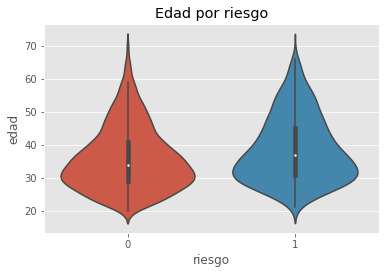

In [ ]:
# Gráfico: edad

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'riesgo',  # variable dicotómica cualitativa
        y     = 'edad',    # variable cuantitativa
        data  = data_riesgo_finalRL,
        #color = "white",
        ax    = ax
    )

ax.set_title('Edad por riesgo');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==0]['edad'],
                x2 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==1]['edad'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=-8.843, p-value=0.000


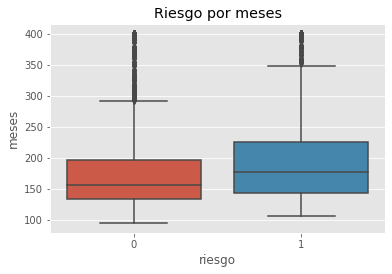

In [ ]:
# Gráfico: meses

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.boxplot(
        x     = 'riesgo',
        y     = 'meses',
        data  = data_riesgo_finalRL,
        #color = "white",
        ax    = ax
    )

ax.set_title('Riesgo por meses');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==0]['meses'],
                x2 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==1]['meses'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=-10.544, p-value=0.000


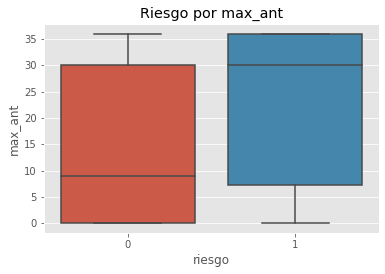

In [ ]:
# Gráfico: max_ant

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.boxplot(
        x     = 'riesgo',
        y     = 'max_ant',
        data  = data_riesgo_finalRL,
        #color = "white",
        ax    = ax
    )

ax.set_title('Riesgo por max_ant');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==0]['max_ant'],
                x2 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==1]['max_ant'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=-17.740, p-value=0.000


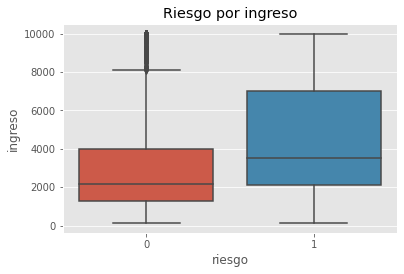

In [ ]:
# Gráfico: ingreso

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.boxplot(
        x     = 'riesgo',
        y     = 'ingreso',
        data  = data_riesgo_finalRL,
        #color = "white",
        ax    = ax
    )

ax.set_title('Riesgo por ingreso');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==0]['ingreso'],
                x2 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==1]['ingreso'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=-14.864, p-value=0.000


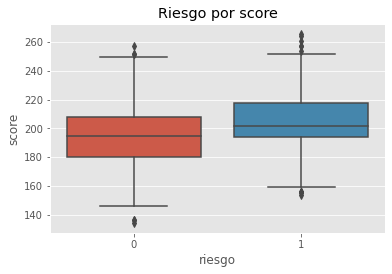

In [ ]:
# Gráfico: score

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.boxplot(
        x     = 'riesgo',
        y     = 'score',
        data  = data_riesgo_finalRL,
        #color = "white",
        ax    = ax
    )

ax.set_title('Riesgo por score');

In [ ]:
# T-test diferencias

res_ttest = ttest_ind(
                x1 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==0]['score'],
                x2 = data_riesgo_finalRL[data_riesgo_finalRL['riesgo'] ==1]['score'],
                alternative='two-sided'
            )

print('Estadístico=%.3f, p-value=%.3f' % (res_ttest[0], res_ttest[1]))

Estadístico=-16.078, p-value=0.000


### Transformación de variables

In [ ]:
data_riesgo_finalRL["edadr"] = np.log10(data_riesgo_finalRL["edad"]/5)

data_riesgo_finalRL["mesesr"] = 1/np.sqrt(data_riesgo_finalRL["meses"])

data_riesgo_finalRL["max_ant_anyos"] = data_riesgo_finalRL["max_ant"]/24
data_riesgo_finalRL["ingresor"] = np.log10(np.sqrt(1/data_riesgo_finalRL["ingreso"]))**2
data_riesgo_finalRL["scorer"] = np.log10(np.sqrt(data_riesgo_finalRL["score"]))

data_riesgo_finalRL["sc_edad"] = data_riesgo_finalRL["score"]/data_riesgo_finalRL["edad"]

data_riesgo_finalRL["anyos"] = np.log10(data_riesgo_finalRL["meses"]/12)


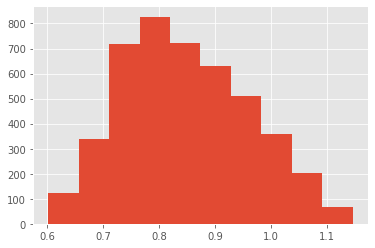

In [ ]:
data_riesgo_finalRL["edadr"].hist()

In [ ]:
data_riesgo_finalRL.head()

,edad,meses,max_ant,ingreso,score,tipo_vivienda_1.0,tipo_vivienda_2.0,tipo_vivienda_3.0,tipo_vivienda_4.0,zona_1.0,...,nivel_4.0,nivel_5.0,riesgo,edadr,mesesr,max_ant_anyos,ingresor,scorer,sc_edad,anyos
0,33.0,128.0,6.0,3230.0,192.0,0,1,0,0,0,...,0,0,0,0.819544,0.088388,0.250000,3.078626,1.141651,5.818182,1.028029
1,32.0,185.0,7.0,2930.0,217.0,0,1,0,0,1,...,0,1,0,0.806180,0.073521,0.291667,3.004793,1.168230,6.781250,1.187990
2,28.0,137.0,7.0,1883.7,202.0,0,1,0,0,1,...,0,0,0,0.748188,0.085436,0.291667,2.681425,1.152676,7.214286,1.057539
3,56.0,200.0,0.0,850.0,194.0,0,1,0,0,1,...,0,1,0,1.049218,0.070711,0.000000,2.145374,1.143901,3.464286,1.221849
4,32.0,131.0,36.0,3200.0,200.0,0,1,0,0,1,...,0,0,0,0.806180,0.087370,1.500000,3.071519,1.150515,6.250000,1.038090


In [ ]:
X_data = data_riesgo_finalRL.drop(columns = ['riesgo'])
Y_data = data_riesgo_finalRL['riesgo']

In [ ]:
cols = X_data.columns
len(cols)

26

### Ajuste del modelo

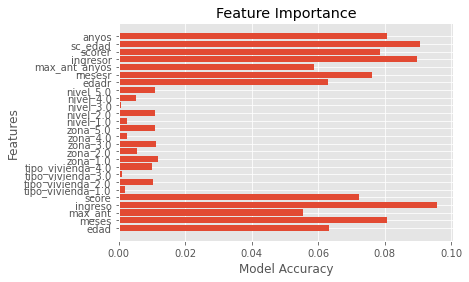

In [ ]:
# importancia de las variables

from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forest = RFC(n_jobs=2,n_estimators=50)
forest.fit(X_data, Y_data)
importances = forest.feature_importances_


# horizontal bar plot
pos = np.arange(26) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, (cols))
plt.grid(True)

In [ ]:
# Datos en X e Y.
# 'edad','meses','max_ant','ingreso','score' ,    'tipo_vivienda_2.0',     'tipo_vivienda_4.0', 'nivel_2.0', 'zona_3.0', 'zona_1.0',  'zona_5.0', 
X_data = data_riesgo_finalRL.drop(columns = ['riesgo', 'edadr','mesesr','max_ant','ingreso','score' ,'tipo_vivienda_1.0','tipo_vivienda_3.0',
                                            'nivel_3.0', 
                                             'zona_2.0','zona_4.0',  'nivel_5.0',  'nivel_1.0', 
                                             'nivel_3.0','nivel_4.0'])
Y_data = data_riesgo_finalRL['riesgo']

X_data = X_data.round(3)

print(X_data.head())
print(Y_data.head())

   edad  meses  tipo_vivienda_2.0  tipo_vivienda_4.0  zona_1.0  zona_3.0  \
0  33.0  128.0                  1                  0         0         1   
1  32.0  185.0                  1                  0         1         0   
2  28.0  137.0                  1                  0         1         0   
3  56.0  200.0                  1                  0         1         0   
4  32.0  131.0                  1                  0         1         0   

   zona_5.0  nivel_2.0  max_ant_anyos  ingresor  scorer  sc_edad  anyos  
0         0          1          0.250     3.079   1.142    5.818  1.028  
1         0          0          0.292     3.005   1.168    6.781  1.188  
2         0          1          0.292     2.681   1.153    7.214  1.058  
3         0          0          0.000     2.145   1.144    3.464  1.222  
4         0          1          1.500     3.072   1.151    6.250  1.038  
0    0
1    0
2    0
3    0
4    0
Name: riesgo, dtype: int64


In [ ]:
X_data.head()

,edad,meses,tipo_vivienda_2.0,tipo_vivienda_4.0,zona_1.0,zona_3.0,zona_5.0,nivel_2.0,max_ant_anyos,ingresor,scorer,sc_edad,anyos
0,33.0,128.0,1,0,0,1,0,1,0.250,3.079,1.142,5.818,1.028
1,32.0,185.0,1,0,1,0,0,0,0.292,3.005,1.168,6.781,1.188
2,28.0,137.0,1,0,1,0,0,1,0.292,2.681,1.153,7.214,1.058
3,56.0,200.0,1,0,1,0,0,0,0.000,2.145,1.144,3.464,1.222
4,32.0,131.0,1,0,1,0,0,1,1.500,3.072,1.151,6.250,1.038


In [ ]:
X_data = sm.add_constant(X_data, prepend=True)

In [ ]:
# Creación del modelo

modelo = sm.Logit(endog=Y_data, exog=X_data,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.555408
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 riesgo   No. Observations:                 4500
Model:                          Logit   Df Residuals:                     4486
Method:                           MLE   Df Model:                           13
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                 0.09078
Time:                        02:33:37   Log-Likelihood:                -2499.3
converged:                       True   LL-Null:                       -2748.9
Covariance Type:            nonrobust   LLR p-value:                 2.262e-98
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -19.6356      3.257     -6.029      0.000     -26.019     -13.253
edad    

In [ ]:
# Intervalos de confianza para los coeficientes del modelo

intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci = pd.DataFrame(intervalos_ci)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-26.018614,-13.252563
edad,-0.021775,0.035134
meses,-0.000953,0.009831
tipo_vivienda_2.0,-0.411350,0.583883
tipo_vivienda_4.0,-0.648250,0.388295
zona_1.0,-0.073646,0.509388
zona_3.0,-0.299391,0.357007
zona_5.0,0.363886,1.089745
nivel_2.0,-0.090054,0.230118
max_ant_anyos,0.449343,0.688620


In [ ]:
# Predicciones con intervalo de confianza 
import numpy as np
predicciones = modelo.predict(exog = X_data)

# Clasificación de las predicciones

clasificacion = np.where(predicciones < 0.6, 0, 1)  # ---> nro 0 / n 
clasificacion

array([0, 0, 0, ..., 0, 1, 1])

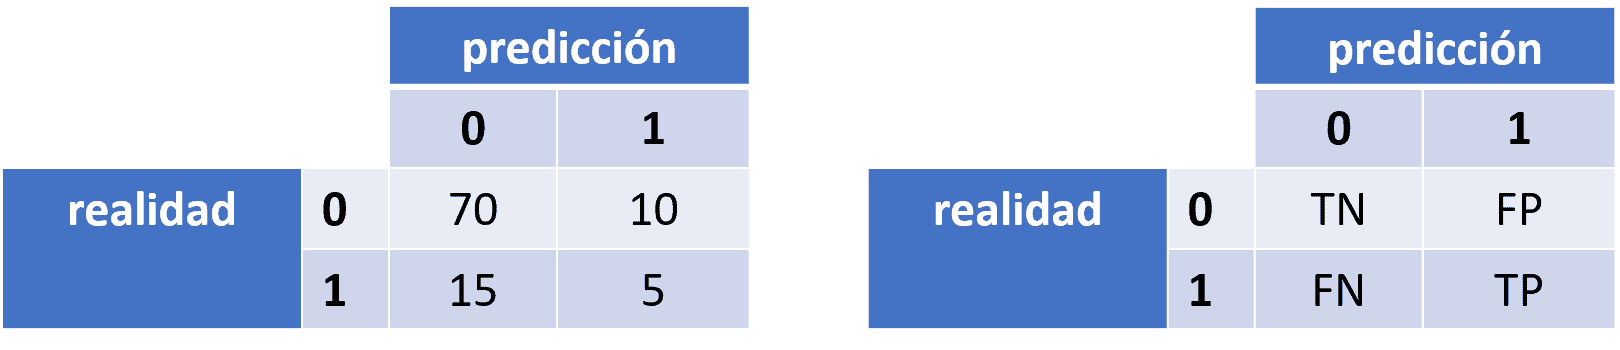

In [ ]:
# Matriz de confusión de las predicciones

confusion_matrix = pd.crosstab(
    Y_data.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,3099,51
1,1257,93


In [ ]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = Y_data,
        y_pred = clasificacion
    )
)

              precision    recall  f1-score   support

           0       0.71      0.98      0.83      3150
           1       0.65      0.07      0.12      1350

    accuracy                           0.71      4500
   macro avg       0.68      0.53      0.48      4500
weighted avg       0.69      0.71      0.62      4500



Dsempeño del algoritmo:

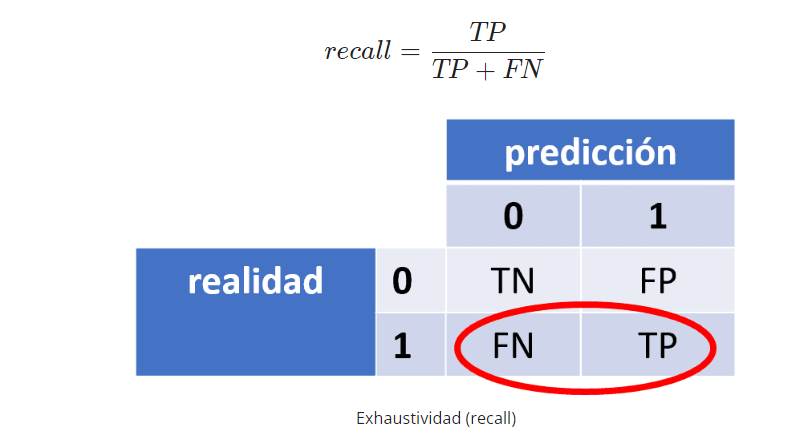

Exhaustividad = Exaustividad.

Es decir, el modelo sólo es capaz de identificar un 7% de los clientes riesgosos. Esto significa que el modelo del ejemplo sólo es capaz de identificar 1 de cada 10 de los clientes que nos generan riesgo.

El p-value del predictor matedel riesgo no es significativo (p-value = 1.000).
Se sugiere crear nuevas variables y buscar mejorar el modelo paramétrico.

Gracias! DATA & ANALYTICS